In [2]:
import pandas as pd

In [2]:
df = pd.read_pickle('../data/restaurants/results.pickle')

In [3]:
df.head()

,user,item,rating,prediction,error
0,40630,37682,4,3.031540,0.968460
1,40630,40543,4,3.029181,0.970819
2,40630,7153,3,2.850625,0.149375
3,40630,45328,2,3.031540,1.031540
4,40630,51282,4,3.030944,0.969056


In [4]:
file = '../data/restaurants/item_index2entity_id.txt'
i = 0
entity_id2index = dict()
for line in open(file, encoding='utf-8').readlines():
    item = line.strip().split('\t')[0]
    item_id = int(line.strip().split('\t')[1])
    entity_id2index[item_id] = item
    i += 1

business_id = []
for index, row in df.iterrows():
    business_id.append(entity_id2index[int(row['item'])])
df['business_id'] = business_id

In [5]:
df

,user,item,rating,prediction,error,business_id
0,40630,37682,4,3.031540e+00,0.968460,6eWfwUSegYhGvgVemLEKDQ
1,40630,40543,4,3.029181e+00,0.970819,eR6FYdWNpFagMxuindVpew
2,40630,7153,3,2.850625e+00,0.149375,0_pOXVua2DBSl4KU830_vg
3,40630,45328,2,3.031540e+00,1.031540,Miusm6_DPtfvJqat7v5pSA
4,40630,51282,4,3.030944e+00,0.969056,AMOuvUEINcD8xomMSReFog
...,...,...,...,...,...,...
1335,186443,34709,4,2.145722e+00,1.854278,WGy9empna9qxv4jXACD1dA
1336,281336,6084,5,3.561372e+00,1.438628,3gq85JpzYSmr3LUETc24XA
1337,281336,40163,5,2.386466e+00,2.613534,ZuHi5i9coO6YOqXpDpOC5w
1338,143701,2969,5,2.375812e-20,5.000000,MJI4pN34QTHfhblwzd3b5w


In [3]:
business_df = pd.read_pickle('../data/all-restaurants/restaurants.pickle')

In [4]:
business_df

,attributes.Music,name,attributes.OutdoorSeating,attributes.HasTV,attributes.ByAppointmentOnly,review_count,attributes.RestaurantsTableService,attributes.NoiseLevel,attributes.RestaurantsAttire,business_id,...,attributes.CoatCheck,attributes.BYOBCorkage,attributes.DietaryRestrictions,attributes.BYOB,attributes.BusinessAcceptsCreditCards,attributes.HappyHour,attributes.RestaurantsPriceRange2,attributes.GoodForDancing,hours.Friday,attributes.Corkage
0,NaN,Oskar Blues Taproom,True,True,NaN,86,True,u'average','casual',6iYb2HFDywm3zjuRg0shjw,...,NaN,NaN,NaN,NaN,True,True,2,NaN,11:0-23:0,NaN
1,NaN,Flying Elephants at PDX,False,False,False,126,NaN,u'average',u'casual',tCbdrRPZA0oiIYSmHG3J0w,...,NaN,NaN,NaN,NaN,True,NaN,2,NaN,5:0-18:0,NaN
5,NaN,Bob Likes Thai Food,False,False,NaN,169,NaN,u'average',u'casual',D4JtQNTI4X3KcbzacDJsMw,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,17:0-21:0,NaN
7,NaN,Boxwood Biscuit,NaN,NaN,NaN,11,NaN,NaN,NaN,jFYIsSb7r1QeESVUnXPHBw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,Mr G's Pizza & Subs,True,True,NaN,39,False,'average',u'casual',HPA_qyMEddpAEtFof02ixg,...,NaN,NaN,NaN,NaN,True,NaN,2,NaN,11:0-22:0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160573,NaN,Split Dine and Drink,True,True,NaN,48,NaN,u'average','casual',Zl6SUy6x9jqjRu2HbtEO6A,...,NaN,NaN,NaN,NaN,True,True,2,NaN,11:0-0:0,NaN
160574,"{'dj': False, 'background_music': False, 'no_m...",Maudie’s Hill Country,True,True,NaN,310,True,u'average',u'casual',Q78fYV6B6P6GmX07YVgi4g,...,False,NaN,NaN,NaN,True,True,2,False,9:0-21:30,NaN
160575,NaN,Mama's Cocina Latina,True,True,NaN,185,False,'average','casual',uXdQkuEtvLAzfc3MsO-sTQ,...,NaN,NaN,NaN,NaN,True,NaN,2,NaN,0:0-0:0,NaN
160583,NaN,Havana Cafe,NaN,True,NaN,10,NaN,NaN,NaN,GB75wPibj3IjNauaoCxyGA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
business_df = business_df[['business_id', 'categories']]

In [8]:
df = pd.merge(df, business_df, how="left", on=["business_id"])

In [9]:
df = df.sort_values(by='error')

In [10]:
df = df.round(2)

In [11]:
df

,user,item,rating,prediction,error,business_id,categories
1326,149324,9573,5,5.0,0.0,ZM4AMqHue_Qec9DVcb9PBw,"American (Traditional), Bars, Nightlife, Resta..."
1322,149324,17339,5,5.0,0.0,aTN1s8U6yM1MkQlcrjRNNg,"Breakfast & Brunch, Restaurants"
1324,149324,8291,5,5.0,0.0,ypcxtK09vGtgN32FTcaveA,"Chicken Wings, Sandwiches, Event Planning & Se..."
1325,149324,9056,5,5.0,0.0,cblMeiEoWS4DXl88zSzbKg,"Breakfast & Brunch, American (Traditional), Re..."
1327,149324,41429,5,5.0,0.0,HZ4y1OEU7-1Y0y7CMdotLQ,"Asian Fusion, Food, Mexican, Sushi Bars, Resta..."
...,...,...,...,...,...,...,...
609,187313,20061,5,0.0,5.0,pKdv-j1llPa93H61bk99RA,"Korean, Restaurants"
1119,393783,45376,5,0.0,5.0,skJ7MuoT1YZq1WfILiCtwA,"Steakhouses, Restaurants, Seafood, Food, Speci..."
608,187313,45867,5,0.0,5.0,pYu29jr2l4Iyd9h-Z1PSlA,"Sandwiches, Pizza, Salad, Restaurants"
800,265071,30970,5,0.0,5.0,ZUAb3zLBBJP689gjJ-P6LA,"Vegan, Food, Vegetarian, Restaurants, Ethiopia..."


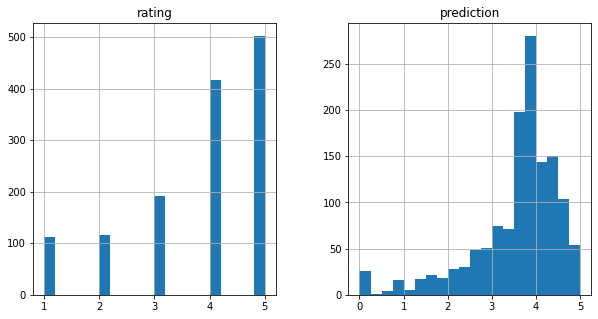

In [12]:
hist = df.hist(column=['rating', 'prediction'], figsize=(10, 5), bins=20)

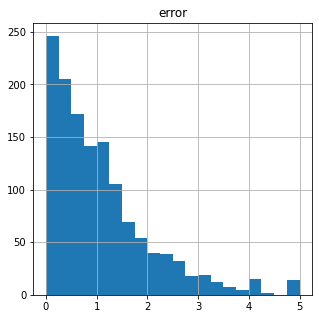

In [13]:
hist = df.hist(column='error', figsize=(5, 5), bins=20)

In [14]:
error_df = df[df['prediction'] == 0]

In [15]:
error_df

,user,item,rating,prediction,error,business_id,categories
165,412704,32564,1,0.0,1.0,AEzIqFtXrJITE4toGNtAuA,"Chinese, Restaurants"
1016,256422,32446,1,0.0,1.0,4rEN8qhygzdJWIM5Mn8HDQ,"Tex-Mex, Mexican, Restaurants"
1227,378491,22989,2,0.0,2.0,RJlJvJ17jQFSck2OECtC3Q,"Mexican, Restaurants"
1228,378491,49758,2,0.0,2.0,kbhTPi_aPjil0y9EpyTOgg,"Caribbean, Nightlife, Bars, Laotian, Seafood, ..."
801,265071,7865,2,0.0,2.0,AjUhiD7BxVlVg9Vz8wNJFQ,"American (Traditional), Cocktail Bars, Bars, G..."
281,173323,43721,3,0.0,3.0,KPFscTq_-jGPla0cNQRUcg,"American (Traditional), Nightlife, Bars, Resta..."
26,152143,44997,4,0.0,4.0,89ZEQsUu6ZcElVHpdOotBw,"Japanese, Chinese, Restaurants, Sushi Bars"
25,152143,1163,4,0.0,4.0,Yf1es-trm_zKungOxOkz-A,"Pasta Shops, Italian, Nightlife, Bars, French,..."
766,314319,50801,4,0.0,4.0,cXfrjcNQ4msDvvR-9yFJaA,"American (New), Diners, Tex-Mex, Breakfast & B..."
173,316277,29259,4,0.0,4.0,5H2Vd9pYSdeU340ge5mFXA,"Mexican, Restaurants"


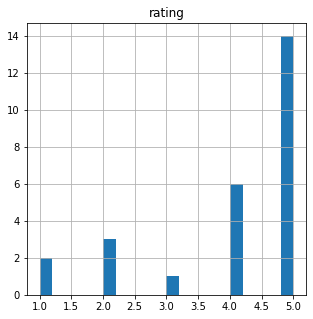

In [16]:
hist2 = error_df.hist(column='rating', figsize=(5, 5), bins=20)

In [17]:
correct_df = df[df['prediction'] != 0]

In [18]:
correct_df

,user,item,rating,prediction,error,business_id,categories
1326,149324,9573,5,5.00,0.00,ZM4AMqHue_Qec9DVcb9PBw,"American (Traditional), Bars, Nightlife, Resta..."
1322,149324,17339,5,5.00,0.00,aTN1s8U6yM1MkQlcrjRNNg,"Breakfast & Brunch, Restaurants"
1324,149324,8291,5,5.00,0.00,ypcxtK09vGtgN32FTcaveA,"Chicken Wings, Sandwiches, Event Planning & Se..."
1325,149324,9056,5,5.00,0.00,cblMeiEoWS4DXl88zSzbKg,"Breakfast & Brunch, American (Traditional), Re..."
1327,149324,41429,5,5.00,0.00,HZ4y1OEU7-1Y0y7CMdotLQ,"Asian Fusion, Food, Mexican, Sushi Bars, Resta..."
...,...,...,...,...,...,...,...
556,371201,18170,5,0.77,4.23,1RVkS4L6QQNUy4LW1UwFig,"Italian, Food, Restaurants, Beer, Wine & Spirits"
557,371201,46711,5,0.77,4.23,uX5Sc4IPRqoH8rD6bqeDVg,"Sports Bars, Food, American (Traditional), Bee..."
706,142741,35564,5,0.76,4.24,1FuKzqTzgSvS9onvaAoZZA,"Italian, Restaurants, Pizza, Salad"
1255,340046,51280,5,0.57,4.43,GpnYbFgyNho_kmrUiEL2JQ,"Middle Eastern, Greek, Restaurants, Burgers, M..."


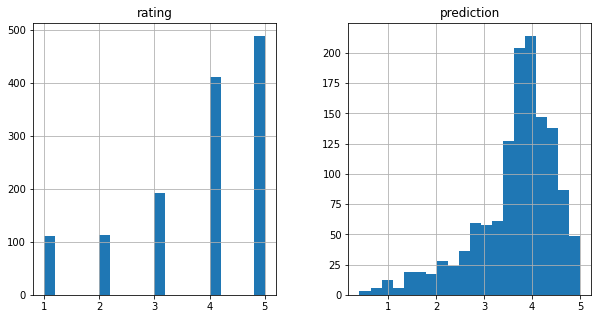

In [19]:
hist = correct_df.hist(column=['rating', 'prediction'], figsize=(10, 5), bins=20)

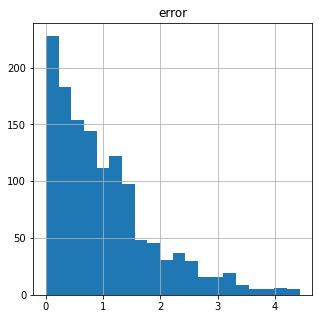

In [20]:
hist = correct_df.hist(column='error', figsize=(5, 5), bins=20)

In [21]:
import math
rmse = 0
n = 0
for index, row in correct_df.iterrows():
    rmse += row['error']**2
    n += 1
rmse = math.sqrt(rmse / n)
print(rmse)

1.3427908022132002


In [22]:
import math
rmse = 0
n = 0
for index, row in df.iterrows():
    rmse += row['error']**2
    n += 1
rmse = math.sqrt(rmse / n)
print(rmse)

1.455370009884648


In [23]:
category_dict = dict()
for index, row in error_df.iterrows():
    for c in row['categories'].split(', '):
        if c not in category_dict:
            category_dict[c] = 1
        else:
            category_dict[c] += 1

In [24]:
len(category_dict)

58

In [25]:
new_dict = {k:v for k, v in sorted(category_dict.items(), key=lambda item: item[1])[90:]}

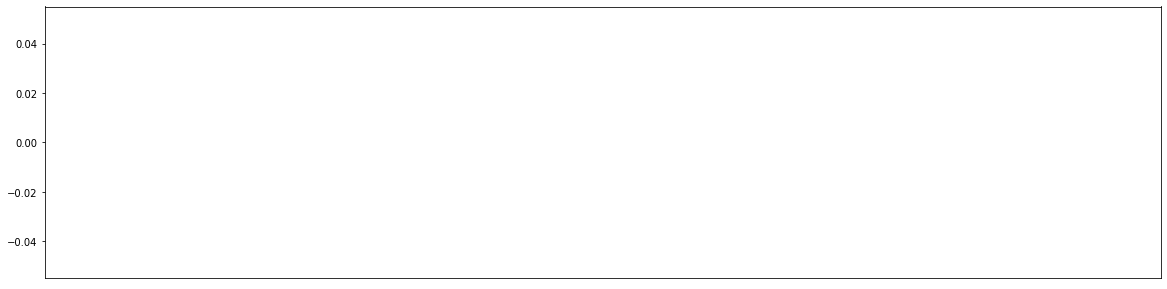

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
plt.bar(range(len(new_dict)), list(new_dict.values()), align='center')
plt.xticks(range(len(new_dict)), list(new_dict.keys()))
plt.show()